In [27]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [28]:
# Specify path to merged dataset
merged_dataset_to_load = "data/merged_school_zhi_value.csv"

# Read merged dataset and store into dataframe
merged_data = pd.read_csv(merged_dataset_to_load)
merged_data = merged_data.drop(columns="Unnamed: 0")
merged_data.head()

,Zip Code,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,Science Achievement,Social Studies Achievement,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,32603,J. J. FINLEY ELEMENTARY SCHOOL,55.0,57.0,45.0,56.0,59.0,45.0,60.0,NaN,...,279827.0,283381.0,286035.0,287334.0,287821.0,289008.0,290524.0,291696.0,291216.0,291212.0
1,32609,STEPHEN FOSTER ELEMENTARY SCHOOL,63.0,61.0,38.0,69.0,66.0,40.0,58.0,NaN,...,132431.0,132669.0,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0
2,32641,LAKE FOREST ELEMENTARY SCHOOL,23.0,31.0,56.0,26.0,32.0,37.0,18.0,NaN,...,101256.0,101874.0,102785.0,103191.0,103928.0,104809.0,106085.0,107431.0,108637.0,109839.0
3,32605,LITTLEWOOD ELEMENTARY SCHOOL,63.0,61.0,50.0,61.0,66.0,50.0,56.0,NaN,...,207175.0,207517.0,207737.0,208196.0,208743.0,209731.0,211050.0,212435.0,213381.0,214302.0
4,32609,W. A. METCALFE ELEMENTARY SCHOOL,29.0,57.0,80.0,48.0,71.0,62.0,39.0,NaN,...,132431.0,132669.0,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0


In [29]:
# Calculate the mean and median of the house values for 2019
monthly_house_values = ["2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11","2019-12"]
merged_data["Average House Value 2019"] = merged_data[monthly_house_values].mean(axis=1)
merged_data["Median House Value 2019"] = merged_data[monthly_house_values].median(axis=1)
merged_data.head()

,Zip Code,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,Science Achievement,Social Studies Achievement,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Average House Value 2019,Median House Value 2019
0,32603,J. J. FINLEY ELEMENTARY SCHOOL,55.0,57.0,45.0,56.0,59.0,45.0,60.0,NaN,...,286035.0,287334.0,287821.0,289008.0,290524.0,291696.0,291216.0,291212.0,286161.000000,287577.5
1,32609,STEPHEN FOSTER ELEMENTARY SCHOOL,63.0,61.0,38.0,69.0,66.0,40.0,58.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,135096.666667,133966.5
2,32641,LAKE FOREST ELEMENTARY SCHOOL,23.0,31.0,56.0,26.0,32.0,37.0,18.0,NaN,...,102785.0,103191.0,103928.0,104809.0,106085.0,107431.0,108637.0,109839.0,104203.083333,103559.5
3,32605,LITTLEWOOD ELEMENTARY SCHOOL,63.0,61.0,50.0,61.0,66.0,50.0,56.0,NaN,...,207737.0,208196.0,208743.0,209731.0,211050.0,212435.0,213381.0,214302.0,209458.916667,208469.5
4,32609,W. A. METCALFE ELEMENTARY SCHOOL,29.0,57.0,80.0,48.0,71.0,62.0,39.0,NaN,...,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0,135096.666667,133966.5


In [30]:
# Calculate the mean and median of house values in December of 2019
# Calculate the mean and median of science achievement scores per zip code
merged_data_group = merged_data.groupby(["Zip Code"])
average_house_value_2019 = merged_data_group["Average House Value 2019"].first()
median_house_value_2019 = merged_data_group["Median House Value 2019"].first()
average_house_value_dec2019 = merged_data_group["2019-12"].mean()
median_house_value_dec2019 = merged_data_group["2019-12"].median()
average_science_achievement_score = merged_data_group["Science Achievement"].mean()
median_science_achievement_score = merged_data_group["Science Achievement"].median()


# Create a dataframe to hold and summarize the results
house_value_science_score_summary = pd.DataFrame({"Average House Value 2019": average_house_value_2019,
                                                "Median House Value 2019": median_house_value_2019,
                                                "Dec 2019 Average House Value": average_house_value_dec2019,
                                                "Dec 2019 Median House Value": median_house_value_dec2019,
                                                "Average Science Achievement Score": average_science_achievement_score,
                                                "Median Science Achievement Score": median_science_achievement_score})

house_value_science_score_summary

,Average House Value 2019,Median House Value 2019,Dec 2019 Average House Value,Dec 2019 Median House Value,Average Science Achievement Score,Median Science Achievement Score
Zip Code,,,,,,
32003,290356.166667,290198.5,293166.0,293166.0,76.200000,80.0
32008,131463.916667,131268.0,133492.0,133492.0,58.000000,58.0
32009,234154.083333,232976.0,241314.0,241314.0,74.000000,74.0
32011,225349.333333,224635.0,233539.0,233539.0,72.666667,76.0
32024,182597.666667,183217.0,183302.0,183302.0,69.750000,64.5
...,...,...,...,...,...,...
34987,276487.750000,276606.5,276785.0,276785.0,65.250000,59.5
34990,393074.583333,392757.0,395699.0,395699.0,69.000000,67.5
34994,296011.333333,296084.0,298578.0,298578.0,68.000000,67.0


In [31]:
# Create a copy of summary dataframe for formatting
house_value_science_score_summary_formatted = house_value_science_score_summary.copy()
house_value_science_score_summary_formatted.iloc[:, :4] = house_value_science_score_summary_formatted.iloc[:, :4].applymap("${:,.2f}".format)
house_value_science_score_summary_formatted.iloc[:, 4:] = house_value_science_score_summary_formatted.iloc[:, 4:].applymap("{:.2f}".format)
house_value_science_score_summary_formatted



,Average House Value 2019,Median House Value 2019,Dec 2019 Average House Value,Dec 2019 Median House Value,Average Science Achievement Score,Median Science Achievement Score
Zip Code,,,,,,
32003,"$290,356.17","$290,198.50","$293,166.00","$293,166.00",76.20,80.00
32008,"$131,463.92","$131,268.00","$133,492.00","$133,492.00",58.00,58.00
32009,"$234,154.08","$232,976.00","$241,314.00","$241,314.00",74.00,74.00
32011,"$225,349.33","$224,635.00","$233,539.00","$233,539.00",72.67,76.00
32024,"$182,597.67","$183,217.00","$183,302.00","$183,302.00",69.75,64.50
...,...,...,...,...,...,...
34987,"$276,487.75","$276,606.50","$276,785.00","$276,785.00",65.25,59.50
34990,"$393,074.58","$392,757.00","$395,699.00","$395,699.00",69.00,67.50
34994,"$296,011.33","$296,084.00","$298,578.00","$298,578.00",68.00,67.00


In [32]:
# Cleanse dataframe: remove rows with missing data fields
house_value_science_score_summary_scrubbed = house_value_science_score_summary[house_value_science_score_summary.isna().any(axis=1)]
house_value_science_score_summary_scrubbed = house_value_science_score_summary.dropna()
house_value_science_score_summary_scrubbed

,Average House Value 2019,Median House Value 2019,Dec 2019 Average House Value,Dec 2019 Median House Value,Average Science Achievement Score,Median Science Achievement Score
Zip Code,,,,,,
32003,290356.166667,290198.5,293166.0,293166.0,76.200000,80.0
32008,131463.916667,131268.0,133492.0,133492.0,58.000000,58.0
32009,234154.083333,232976.0,241314.0,241314.0,74.000000,74.0
32011,225349.333333,224635.0,233539.0,233539.0,72.666667,76.0
32024,182597.666667,183217.0,183302.0,183302.0,69.750000,64.5
...,...,...,...,...,...,...
34987,276487.750000,276606.5,276785.0,276785.0,65.250000,59.5
34990,393074.583333,392757.0,395699.0,395699.0,69.000000,67.5
34994,296011.333333,296084.0,298578.0,298578.0,68.000000,67.0


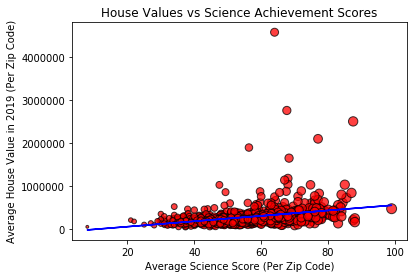

The Linear Regression Equation is y = 6270.53x + -67191.71
The Coefficient of Correlation is: 0.3109654737327387
The Coefficient of Determination is: 0.0966995258538266


In [38]:
# Create a scatter plot to compare the Average Science Acheivement Score vs. Average House Value in 2019 per zip code
# Add the linear regression line to plot
# Print out the linear regression equation, r value and r-squared value along with the plot
x_values = house_value_science_score_summary_scrubbed["Average Science Achievement Score"]
y_values = house_value_science_score_summary_scrubbed["Average House Value 2019"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"b-")
plt.title("House Values vs Science Achievement Scores")
plt.xlabel("Average Science Score (Per Zip Code)")
plt.ylabel("Average House Value in 2019 (Per Zip Code)")
plt.savefig("science_2019_scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"The Linear Regression Equation is {line_eq}")
print(f"The Coefficient of Correlation is: {rvalue}")
print(f"The Coefficient of Determination is: {rvalue**2}")



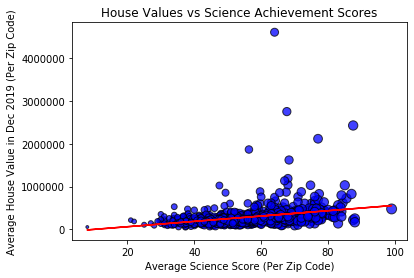

The Linear Regression Equation is y = 6247.59x + -62307.6
The Coefficient of Correlation is: 0.3101721052443951
The Coefficient of Determination is: 0.0962067348717401


In [39]:
# Create a scatter plot to compare the Average Science Acheivement Score vs. Average House Value in December 2019 per zip code
# Add the linear regression line to plot
# Print out the linear regression equation, r value and r-squared value along with the plot
x_values = house_value_science_score_summary_scrubbed["Average Science Achievement Score"]
y_values = house_value_science_score_summary_scrubbed["Dec 2019 Average House Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("House Values vs Science Achievement Scores")
plt.xlabel("Average Science Score (Per Zip Code)")
plt.ylabel("Average House Value in Dec 2019 (Per Zip Code)")
plt.savefig("science_dec2019_scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"The Linear Regression Equation is {line_eq}")
print(f"The Coefficient of Correlation is: {rvalue}")
print(f"The Coefficient of Determination is: {rvalue**2}")



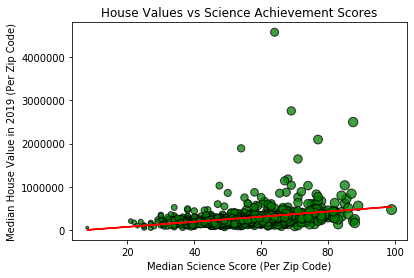

The Linear Regression Equation is y = 5887.3x + -42563.75
The Coefficient of Correlation is: 0.3085751092406731
The Coefficient of Determination is: 0.09521859804289334


In [35]:
# Create a scatter plot to compare the Median Science Acheivement Score vs. Median House Value in 2019 per zip code
# Add the linear regression line to plot
# Print out the linear regression equation, r value and r-squared value along with the plot
x_values = house_value_science_score_summary_scrubbed["Median Science Achievement Score"]
y_values = house_value_science_score_summary_scrubbed["Median House Value 2019"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black", s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("House Values vs Science Achievement Scores")
plt.xlabel("Median Science Score (Per Zip Code)")
plt.ylabel("Median House Value in 2019 (Per Zip Code)")
plt.show()

print(f"The Linear Regression Equation is {line_eq}")
print(f"The Coefficient of Correlation is: {rvalue}")
print(f"The Coefficient of Determination is: {rvalue**2}")

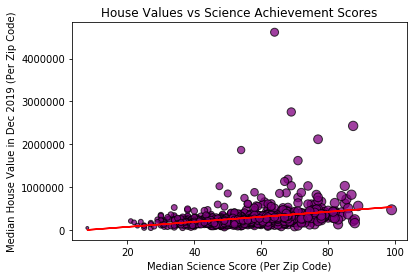

The Linear Regression Equation is y = 5868.13x + -37604.93
The Coefficient of Correlation is: 0.3078319382346845
The Coefficient of Determination is: 0.09476050219732263


In [36]:
# Create a scatter plot to compare the Median Science Acheivement Score vs. Median House Value in December 2019 per zip code
# Add the linear regression line to plot
# Print out the linear regression equation, r value and r-squared value along with the plot
x_values = house_value_science_score_summary_scrubbed["Median Science Achievement Score"]
y_values = house_value_science_score_summary_scrubbed["Dec 2019 Median House Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="purple", edgecolors="black", s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("House Values vs Science Achievement Scores")
plt.xlabel("Median Science Score (Per Zip Code)")
plt.ylabel("Median House Value in Dec 2019 (Per Zip Code)")
plt.show()

print(f"The Linear Regression Equation is {line_eq}")
print(f"The Coefficient of Correlation is: {rvalue}")
print(f"The Coefficient of Determination is: {rvalue**2}")